In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Algerian_forest_fires_bejaia.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [3]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'not fire', 'not fire '], dtype=object)

In [6]:
df.Classes = df.Classes.str.replace(' ', '')  # replacing space with none to get fire and not fire only

In [7]:
df.Classes.unique()

array(['notfire', 'fire'], dtype=object)

In [9]:
dummy1 = pd.get_dummies(df['Classes'], drop_first=True) # encoding done and replaced non fire with 1 and fire with 0

In [10]:
dummy1

,notfire
0,1
1,1
2,1
3,1
4,1
...,...
117,1
118,0
119,1
120,1


In [11]:
df = pd.concat([df, dummy1], axis=1).drop('Classes', axis=1)  # concat with dummy and drop of classes column done

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,notfire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


# consider temp as target variable (dependent variable) and rest are  independent variable

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  notfire      122 non-null    uint8  
dtypes: float64(7), int64(6), uint8(1)
memory usage: 12.6 KB


In [17]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,notfire
day,1.000000e+00,5.358691e-17,NaN,0.181092,-0.210608,0.063970,-0.097489,0.291751,0.542760,0.568644,0.371489,0.557301,0.467585,-0.306384
month,5.358691e-17,1.000000e+00,NaN,-0.035708,-0.088025,-0.007804,0.145180,-0.040746,-0.007624,-0.006211,-0.011281,-0.009113,0.003330,0.066455
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,1.810918e-01,-3.570824e-02,NaN,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367,-0.497810
RH,-2.106080e-01,-8.802546e-02,NaN,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067,0.377328
Ws,6.396952e-02,-7.803641e-03,NaN,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637,0.121408
Rain,-9.748921e-02,1.451800e-01,NaN,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914,0.334392
FFMC,2.917513e-01,-4.074604e-02,NaN,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553,-0.743637
DMC,5.427601e-01,-7.624391e-03,NaN,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759,-0.616951
DC,5.686443e-01,-6.211283e-03,NaN,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911,-0.588464


<AxesSubplot:>

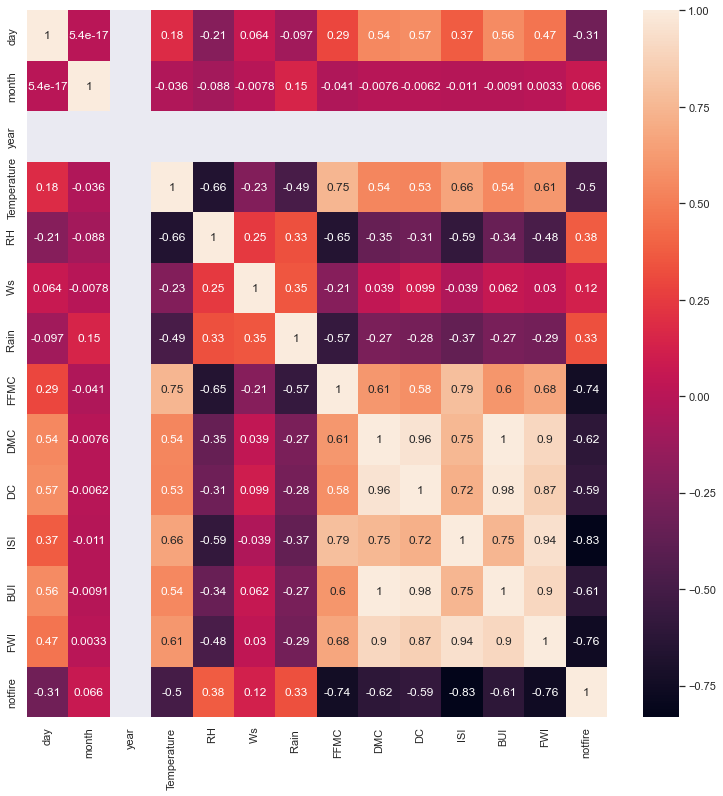

In [20]:
sns.set(rc= {"figure.figsize": (13, 13)})
sns.heatmap(df.corr(),annot=True)

In [21]:
# from the above heat graph we can conclude that temp has a strong corelation with from FFMC TO FWI

Text(0, 0.5, 'Temperature')

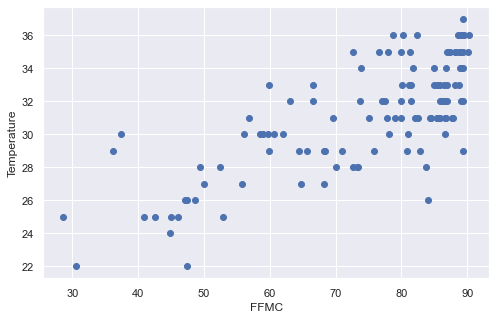

In [25]:
sns.set(rc= {"figure.figsize": (8, 5)})

plt.scatter(df['FFMC'],df['Temperature'])   # more crime and price is less (-ve corelation)
plt.xlabel('FFMC')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

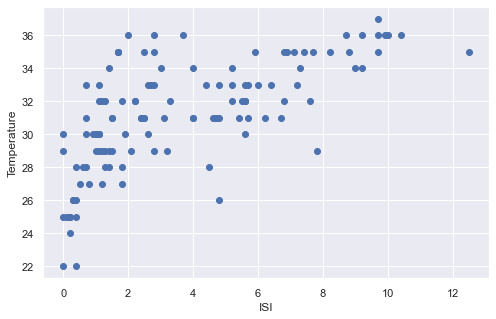

In [26]:
sns.set(rc= {"figure.figsize": (8, 5)})

plt.scatter(df['ISI'],df['Temperature'])   # more crime and price is less (-ve corelation)
plt.xlabel('ISI')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

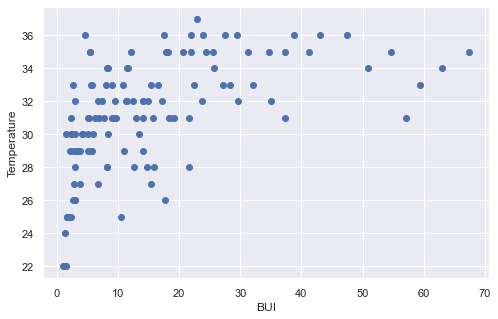

In [27]:
sns.set(rc= {"figure.figsize": (8, 5)})

plt.scatter(df['BUI'],df['Temperature'])   # more crime and price is less (-ve corelation)
plt.xlabel('BUI')
plt.ylabel('Temperature')

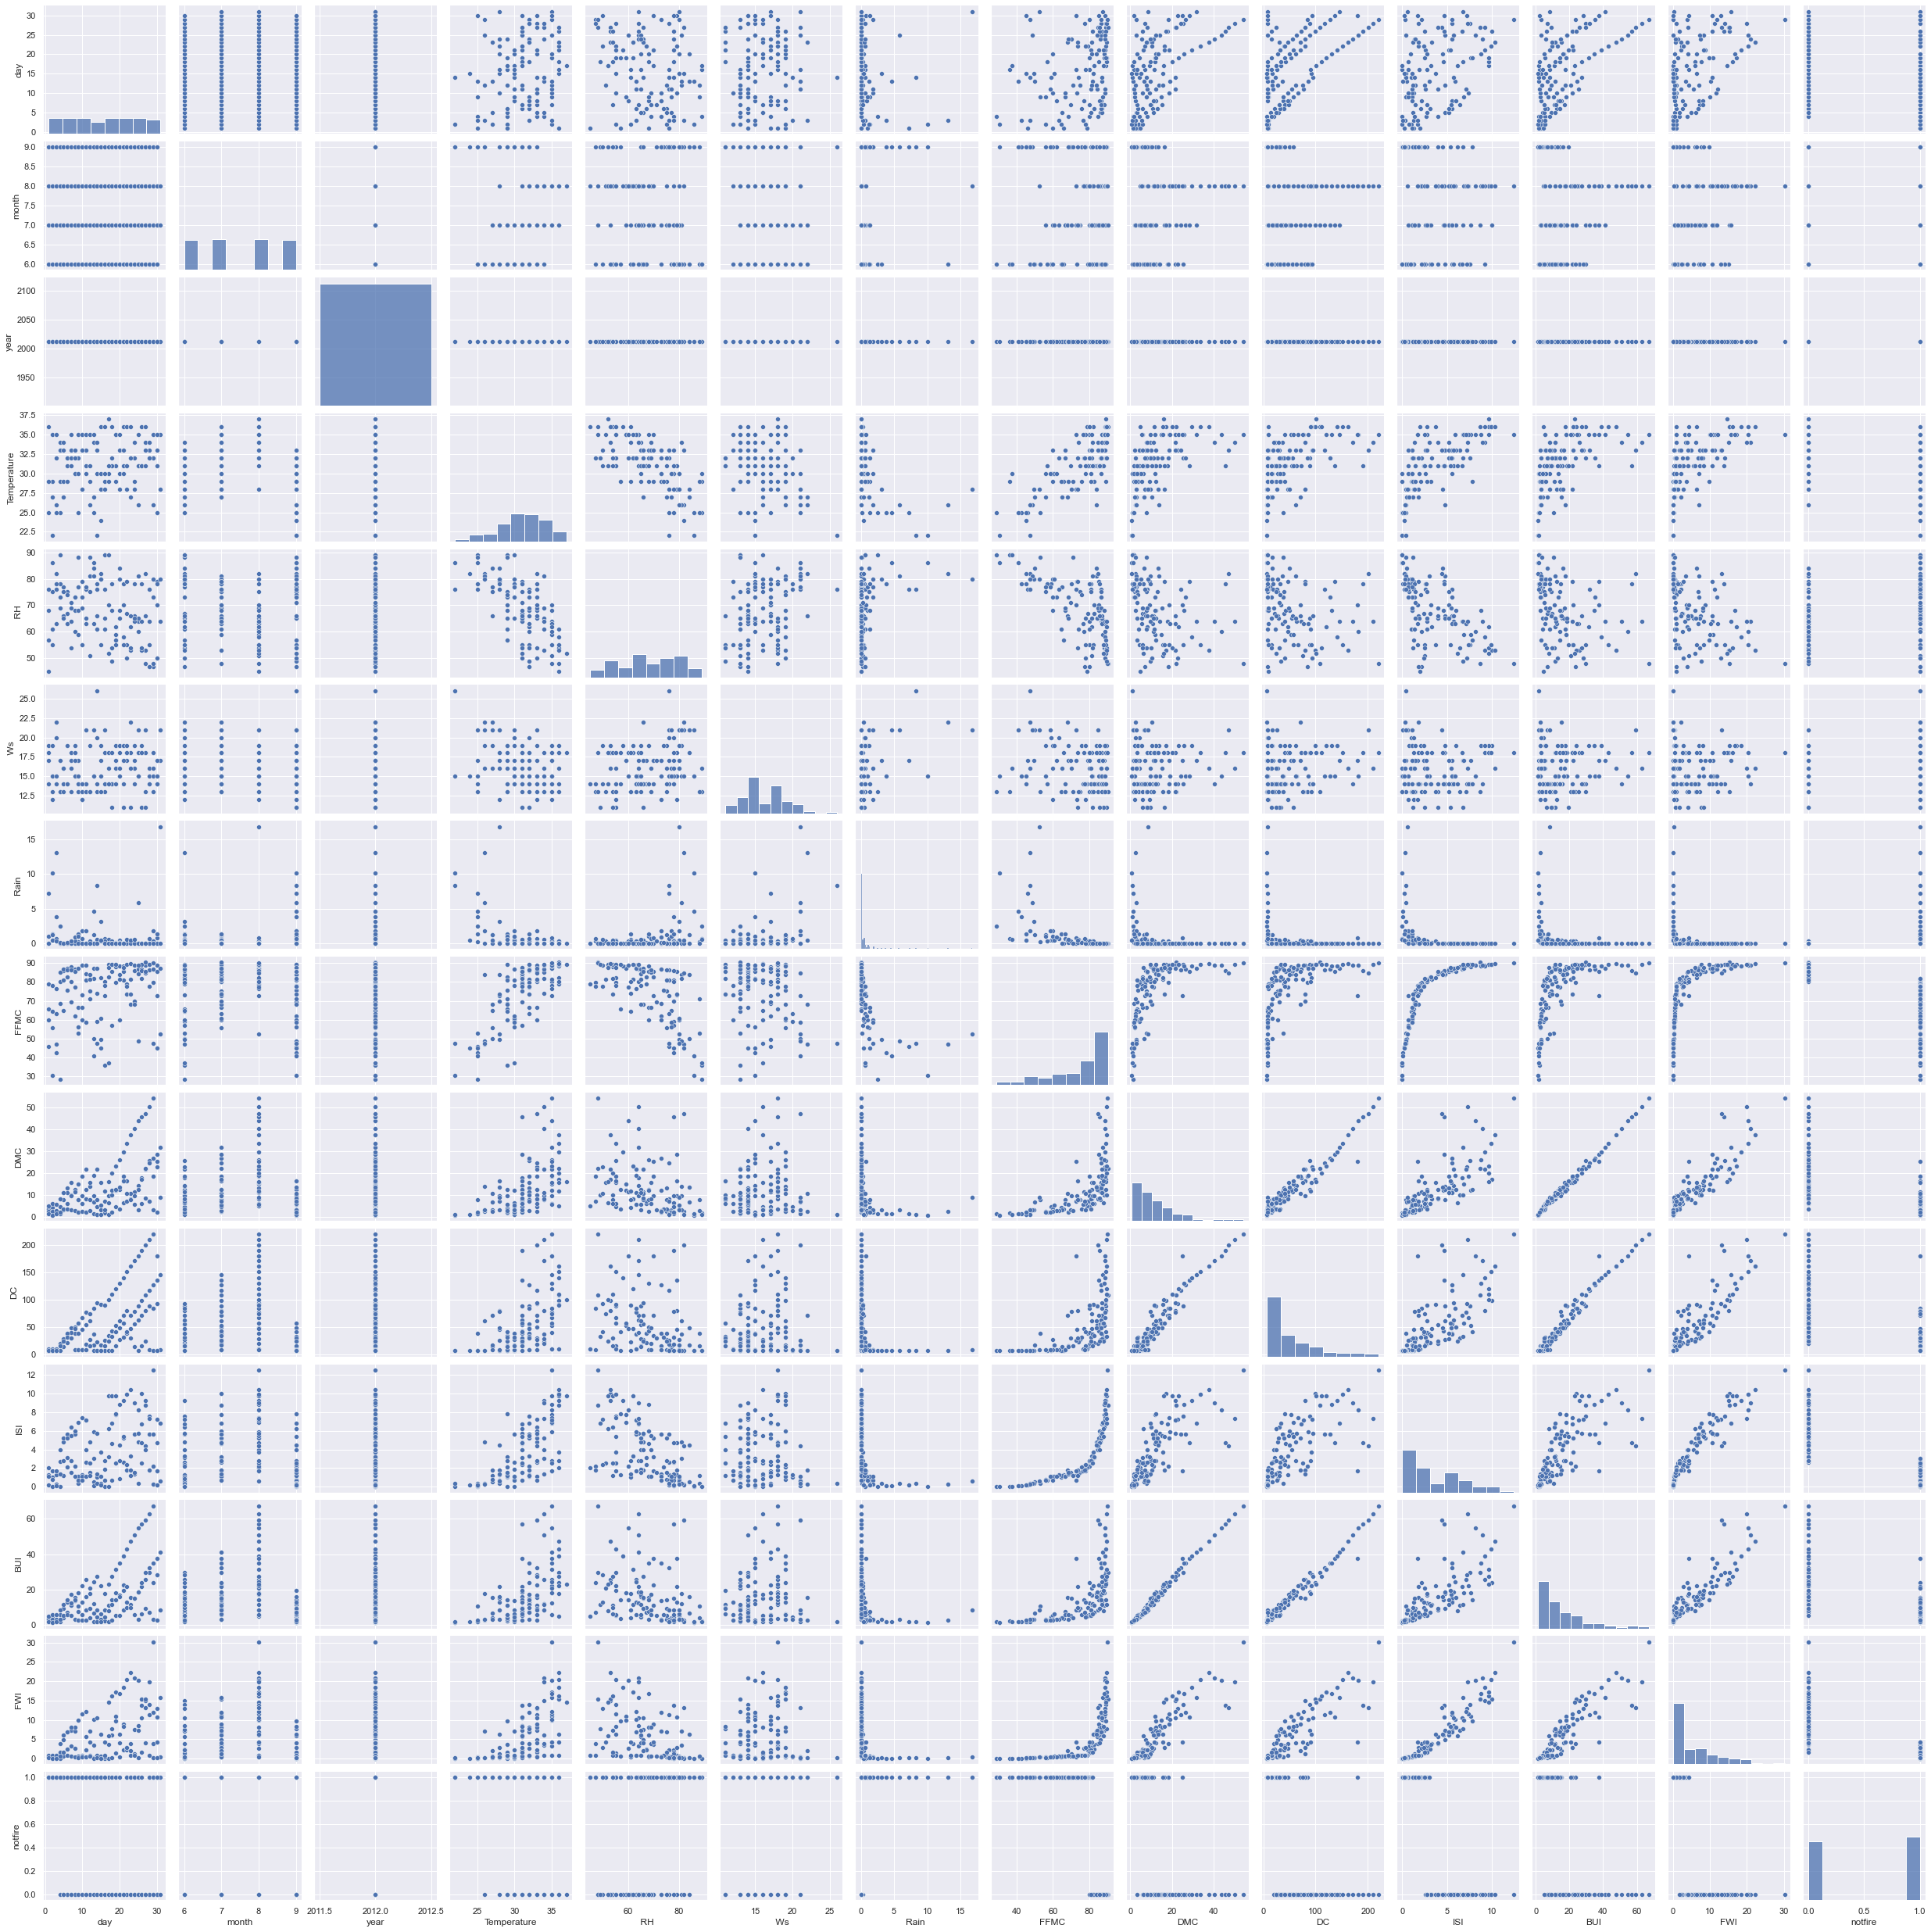

In [29]:
sns.pairplot(df)

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

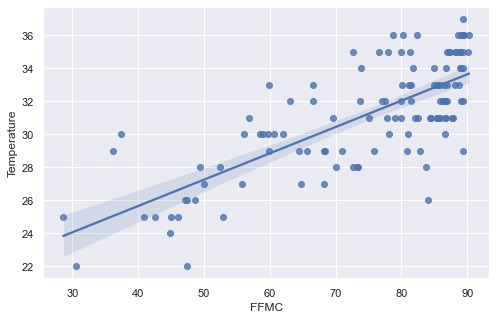

In [30]:
sns.regplot(x='FFMC',y='Temperature',data=df)

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

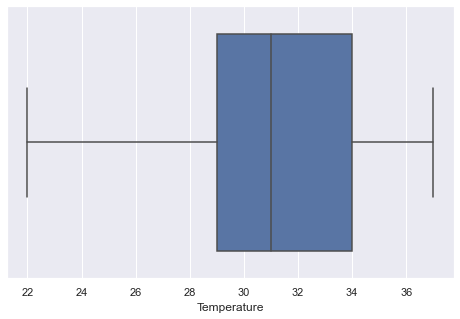

In [31]:
sns.boxplot(df['Temperature'])

In [32]:
X=df.drop('Temperature', axis=1) 
y=df['Temperature'] 

In [33]:
X.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,notfire
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


In [34]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [37]:
X_train

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,notfire
47,18,7,2012,68,14,0.0,85.4,12.1,43.1,4.6,14.2,6.0,0
12,13,6,2012,84,21,1.2,50.0,6.7,17.0,0.5,6.7,0.2,1
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
39,10,7,2012,69,13,0.7,66.6,6.0,9.3,1.1,5.8,0.5,1
23,24,6,2012,66,17,0.0,85.9,11.2,55.8,5.6,14.9,7.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29,6,2012,47,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9,1
95,4,9,2012,73,17,0.1,68.4,1.9,15.7,1.4,2.9,0.5,1
15,16,6,2012,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,1
90,30,8,2012,70,17,0.8,72.7,25.2,180.4,1.7,37.4,4.2,1


In [38]:
y_train

47    31
12    27
0     29
39    33
23    32
      ..
28    32
95    29
15    29
90    35
99    30
Name: Temperature, Length: 97, dtype: int64

In [40]:
print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (97, 13)
X_test shape :  (25, 13)
y_train shape :  (97,)
y_test shape :  (25,)


In [41]:
from sklearn.preprocessing import StandardScaler  # standardscalar- mean =0 and stnd dev=1

sc=StandardScaler()

In [42]:
sc

StandardScaler()

In [43]:
X_train_sc=sc.fit_transform(X_train)

In [44]:
X_train_sc

array([[ 0.22970456, -0.42142722,  0.        , ..., -0.08248374,
         0.06846884, -1.0749677 ],
       [-0.3329556 , -1.29118127,  0.        , ..., -0.5804665 ,
        -0.83154443,  0.93026051],
       [-1.68333997, -1.29118127,  0.        , ..., -0.79957891,
        -0.78499202,  0.93026051],
       ...,
       [ 0.0046405 , -1.29118127,  0.        , ..., -0.87925616,
        -0.86257937,  0.93026051],
       [ 1.58008893,  0.44832683,  0.        , ...,  1.45794292,
        -0.21084563,  0.93026051],
       [-0.89561575,  1.31808087,  0.        , ..., -0.82613799,
        -0.80050949,  0.93026051]])

In [45]:
X_test_sc=sc.transform(X_test)

In [46]:
X_test_sc

array([[ 1.01742878e+00, -4.21427218e-01,  0.00000000e+00,
        -2.72752091e-01,  6.75629387e-01, -3.42669079e-01,
         6.25603554e-01,  1.10580947e-02,  6.73116218e-01,
         3.84714397e-01,  2.03026373e-01,  2.70195949e-01,
        -1.07496770e+00],
       [ 4.64049614e-03,  4.48326828e-01,  0.00000000e+00,
        -6.14132127e-01,  6.75629387e-01, -2.10243180e-01,
         3.66650043e-01, -5.70457265e-02,  7.04904082e-01,
        -2.75184745e-01,  1.43268442e-01, -2.10845625e-01,
        -1.07496770e+00],
       [-1.12067982e+00, -4.21427218e-01,  0.00000000e+00,
        -4.43442109e-01, -7.11376973e-01, -3.42669079e-01,
         7.96133916e-01, -1.25149548e-01, -2.93608830e-01,
         6.48674053e-01, -1.95359834e-01,  1.92608598e-01,
        -1.07496770e+00],
       [-6.70551692e-01,  1.31808087e+00,  0.00000000e+00,
         4.10007981e-01, -1.40488015e+00,  4.51886315e-01,
        -9.15485634e-01, -8.65778603e-01, -8.19043527e-01,
        -9.68078844e-01, -8.46057305e

# linear regg

In [47]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

In [48]:
lr

LinearRegression()

In [49]:
lr.fit(X_train_sc, y_train)   

LinearRegression()

In [50]:
print(lr.coef_)

[-5.10459370e-01 -2.40894573e-01 -1.22124533e-15 -6.90311394e-01
 -4.90465986e-01  6.06018247e-03  1.88947976e+00 -1.69526834e+00
  1.26323232e+00  6.26940166e-02  7.61255748e-01  1.28836417e+00
  1.24531223e+00]


In [51]:
print(lr.intercept_)

31.082474226804123


In [52]:
reg_pred=lr.predict(X_test_sc)

In [53]:
reg_pred

array([31.72120733, 31.22483939, 32.55597158, 29.62165574, 30.44857441,
       34.74876168, 31.20179713, 34.33529779, 31.56428973, 31.19084734,
       26.7900092 , 30.887763  , 30.37022102, 34.60306941, 31.59529028,
       30.77116296, 27.46819011, 33.02890238, 31.62125452, 26.00360537,
       28.21069297, 30.69468433, 35.21095784, 33.88410579, 31.79222479])

In [55]:
y_test

54     31
76     36
35     32
101    33
118    31
72     35
5      31
55     36
1      29
50     33
2      26
53     28
38     32
81     36
37     33
49     33
92     25
73     35
67     32
121    25
44     30
51     28
84     34
70     35
107    30
Name: Temperature, dtype: int64

In [56]:
lr.score(X_test_sc,y_test)  # model accuracy

0.6362102709891564

Text(0, 0.5, 'predicted data')

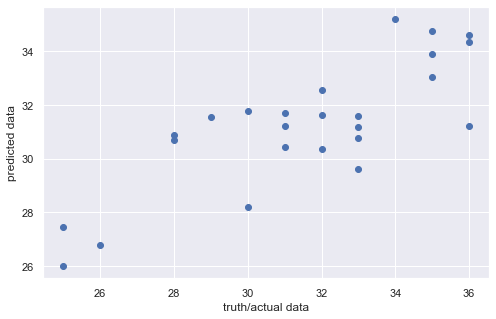

In [57]:
plt.scatter(y_test,reg_pred)

plt.xlabel('truth/actual data')
plt.ylabel('predicted data')

In [58]:
residuals= y_test-reg_pred

In [59]:
residuals

54    -0.721207
76     4.775161
35    -0.555972
101    3.378344
118    0.551426
72     0.251238
5     -0.201797
55     1.664702
1     -2.564290
50     1.809153
2     -0.790009
53    -2.887763
38     1.629779
81     1.396931
37     1.404710
49     2.228837
92    -2.468190
73     1.971098
67     0.378745
121   -1.003605
44     1.789307
51    -2.694684
84    -1.210958
70     1.115894
107   -1.792225
Name: Temperature, dtype: float64

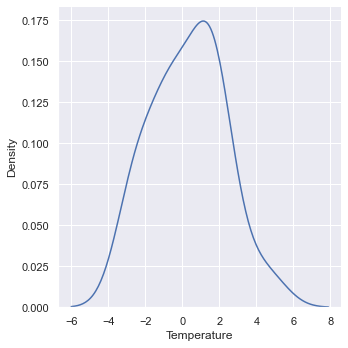

In [60]:
sns.displot(residuals, kind='kde')

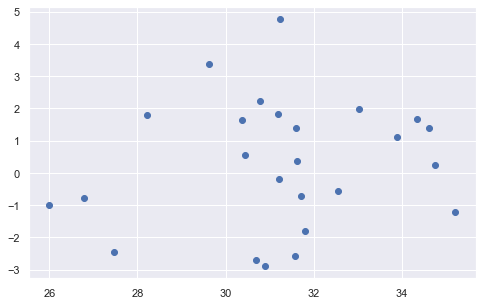

In [61]:
plt.scatter(reg_pred,residuals)

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.8439477926201784
1.6494409885138643
1.960598835208309


In [63]:
from sklearn.metrics import r2_score  # accuracy of the model   # r square
score=r2_score(y_test,reg_pred)
print(score)

0.6362102709891564


In [64]:
lr.score(X_test_sc,y_test)  # accuracy of the model

0.6362102709891564

In [67]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test_sc.shape[1]-1) # adjusted r square

0.20627695488543207

# RIdge

In [72]:
from sklearn.linear_model import Ridge
ridge= Ridge()

In [73]:
ridge

Ridge()

In [74]:
ridge.fit(X_train_sc, y_train) 

Ridge()

In [75]:
ridge_pred=ridge.predict(X_test_sc)

In [76]:
ridge_pred

array([31.51490763, 31.0529357 , 32.63350912, 29.47200452, 30.54326702,
       34.56497982, 31.17488899, 34.25213226, 31.50984367, 31.26826433,
       26.51120613, 30.72238318, 30.4901725 , 34.46666175, 31.68409962,
       30.72034222, 27.2996836 , 32.9540851 , 31.7881177 , 26.10561485,
       28.33793308, 30.73284054, 35.11966557, 33.98705635, 31.62607849])

In [77]:
ridge.score(X_test_sc,y_test)  #  odel accuracy using ridge

0.6384898840965555

Text(0, 0.5, 'predicted data')

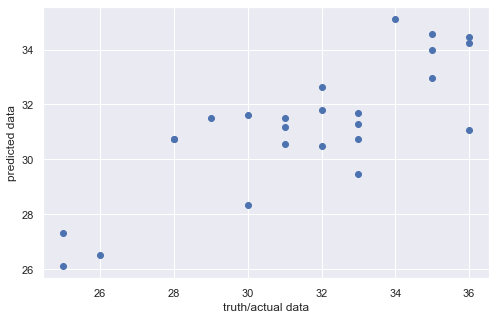

In [78]:
plt.scatter(y_test,ridge_pred)

plt.xlabel('truth/actual data')
plt.ylabel('predicted data')

In [81]:
residuals_ridge= y_test-ridge_pred

In [82]:
residuals_ridge

54    -0.514908
76     4.947064
35    -0.633509
101    3.527995
118    0.456733
72     0.435020
5     -0.174889
55     1.747868
1     -2.509844
50     1.731736
2     -0.511206
53    -2.722383
38     1.509828
81     1.533338
37     1.315900
49     2.279658
92    -2.299684
73     2.045915
67     0.211882
121   -1.105615
44     1.662067
51    -2.732841
84    -1.119666
70     1.012944
107   -1.626078
Name: Temperature, dtype: float64

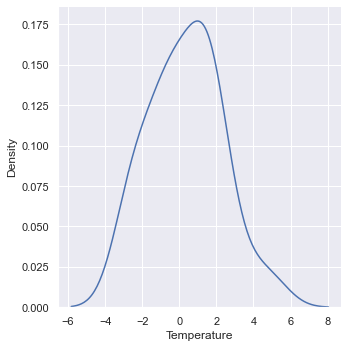

In [83]:
sns.displot(residuals_ridge, kind='kde')

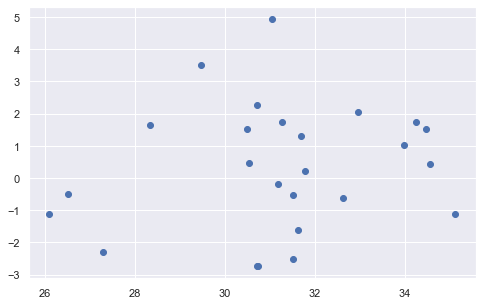

In [84]:
plt.scatter(ridge_pred,residuals_ridge)

In [85]:

print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

3.8198604886821563
1.6147427916535735
1.9544463381434027


In [86]:
score_ridge=r2_score(y_test,ridge_pred)
print(score_ridge)

0.6384898840965555


In [87]:
ridge.score(X_test_sc,y_test)

0.6384898840965555

In [88]:
1-(1-score_ridge)*(len(y_test)-1)/(len(y_test)-X_test_sc.shape[1]-1) # adjusted r square

0.21125065621066663

In [89]:
ridge1= Ridge(alpha=10)  # ridge with lambda =10

In [90]:
ridge1.fit(X_train_sc, y_train) 

Ridge(alpha=10)

In [91]:
ridge1_pred=ridge1.predict(X_test_sc)

In [92]:
ridge1_pred

array([31.45938805, 31.2045149 , 32.66570242, 29.38730341, 30.95118025,
       34.0191729 , 31.36327701, 33.88817312, 31.34993601, 31.55362641,
       25.9527569 , 30.17058692, 30.54257391, 34.26419911, 31.79760878,
       31.08256364, 27.2125486 , 32.95425925, 32.01464056, 26.75435171,
       28.532627  , 30.46880112, 34.94239235, 34.01160187, 31.2770361 ])

In [93]:

print(mean_squared_error(y_test,ridge1_pred))
print(mean_absolute_error(y_test,ridge1_pred))
print(np.sqrt(mean_squared_error(y_test,ridge1_pred)))

3.5499330199724004
1.541459974490656
1.8841265934040632


In [94]:
score_ridge1=r2_score(y_test,ridge1_pred)  # ridge with lambda =10
print(score_ridge1)

0.664035715099523


In [95]:
1-(1-score_ridge1)*(len(y_test)-1)/(len(y_test)-X_test_sc.shape[1]-1) 


# model accuracy,  adjusted r square, ridge with lambda =10

0.2669870147625957

# laso

In [103]:
from sklearn.linear_model import Lasso


In [104]:
ls= Lasso()

In [105]:
ls

Lasso()

In [106]:
ls.fit(X_train_sc,y_train)

Lasso()

In [107]:
ls_pred=ls.predict(X_test_sc)

In [108]:
ls_pred

array([31.94308135, 31.7365108 , 32.20940893, 29.81951107, 32.02390395,
       32.10326461, 31.754567  , 32.6617573 , 30.50706173, 31.88809627,
       28.57045836, 30.46484509, 30.48143936, 32.47448973, 31.95989077,
       31.71742297, 28.65355936, 32.20940893, 32.00180676, 28.51951428,
       29.68495018, 30.70129415, 32.32913814, 32.58218147, 31.46063931])

Text(0, 0.5, 'predicted data')

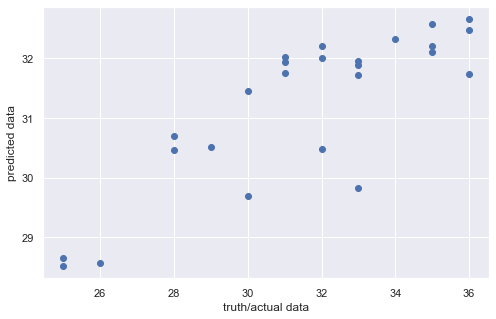

In [110]:
plt.scatter(y_test,ls_pred)

plt.xlabel('truth/actual data')
plt.ylabel('predicted data')

In [111]:
residuals_laso= y_test-ls_pred

In [112]:
residuals_laso

54    -0.943081
76     4.263489
35    -0.209409
101    3.180489
118   -1.023904
72     2.896735
5     -0.754567
55     3.338243
1     -1.507062
50     1.111904
2     -2.570458
53    -2.464845
38     1.518561
81     3.525510
37     1.040109
49     1.282577
92    -3.653559
73     2.790591
67    -0.001807
121   -3.519514
44     0.315050
51    -2.701294
84     1.670862
70     2.417819
107   -1.460639
Name: Temperature, dtype: float64

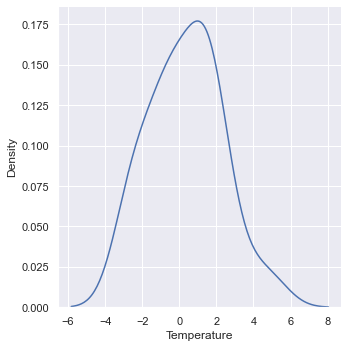

In [113]:
sns.displot(residuals_ridge, kind='kde')

In [114]:

print(mean_squared_error(y_test,ls_pred))
print(mean_absolute_error(y_test,ls_pred))
print(np.sqrt(mean_squared_error(y_test,ls_pred)))

5.428855042656518
2.006483146289257
2.3299903524814254


In [115]:
score_ls=r2_score(y_test,ls_pred)  # model accuracy, 
print(score_ls)

0.4862152632252691


In [116]:
ls.score(X_test_sc,y_test)

0.4862152632252691

In [117]:
1-(1-score_ls)*(len(y_test)-1)/(len(y_test)-X_test_sc.shape[1]-1) # adjusted r , model accuracy

-0.12098488023577669

In [122]:
ls12= Lasso(alpha=0.1)  # considering lambda = 0.1

In [123]:
ls12.fit(X_train_sc,y_train)

Lasso(alpha=0.1)

In [125]:
ls12_pred=ls12.predict(X_test_sc)

In [126]:
ls12.score(X_test_sc,y_test)

0.6828552780767856

In [127]:
score_ls12=r2_score(y_test,ls12_pred)  # model accuracy with lambda=0.1
print(score_ls12)

0.6828552780767856


In [128]:
1-(1-score_ls12)*(len(y_test)-1)/(len(y_test)-X_test_sc.shape[1]-1) # adjusted r square , # model accuracy with lambda=0.1

0.30804787944025946

In [129]:
ls2= Lasso(alpha=0.01) # considering lambda = 0.01

In [130]:
ls2.fit(X_train_sc,y_train)

Lasso(alpha=0.01)

In [131]:
ls2_pred=ls2.predict(X_test_sc)

In [132]:
ls2.score(X_test_sc,y_test)

0.6337664358606252

In [133]:
score_ls2=r2_score(y_test,ls2_pred)  # model accuracy with lambda=0.01
print(score_ls2)

0.6337664358606252


In [134]:
1-(1-score_ls2)*(len(y_test)-1)/(len(y_test)-X_test_sc.shape[1]-1) # adjusted r square    # model accuracy with lambda=0.01

0.20094495096863685

# elastic net

In [135]:
from sklearn.linear_model import ElasticNet

In [136]:
En= ElasticNet()

In [137]:
En.fit(X_train_sc,y_train)

ElasticNet()

In [138]:
En_pred=En.predict(X_test_sc)

In [139]:
En_pred

array([31.96054055, 31.68402375, 32.08676135, 29.54459798, 31.62879954,
       32.17693674, 31.30224436, 33.45262682, 30.38559979, 31.86876507,
       27.42395926, 30.24064967, 30.20124011, 33.43015139, 31.90894697,
       31.50772103, 28.21838317, 32.39655956, 31.88061042, 28.66311048,
       29.48333396, 30.48705958, 33.39141109, 32.96448908, 31.01364733])

Text(0, 0.5, 'predicted data')

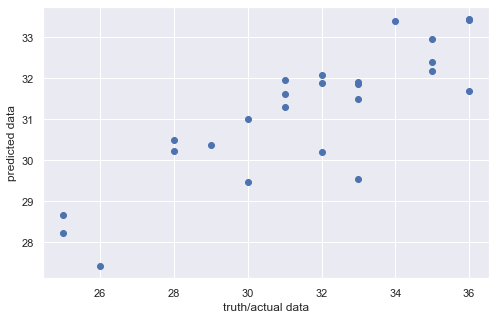

In [140]:
plt.scatter(y_test,En_pred) 

plt.xlabel('truth/actual data')
plt.ylabel('predicted data')

In [141]:
residuals_En= y_test-En_pred

In [142]:
residuals_En

54    -0.960541
76     4.315976
35    -0.086761
101    3.455402
118   -0.628800
72     2.823063
5     -0.302244
55     2.547373
1     -1.385600
50     1.131235
2     -1.423959
53    -2.240650
38     1.798760
81     2.569849
37     1.091053
49     1.492279
92    -3.218383
73     2.603440
67     0.119390
121   -3.663110
44     0.516666
51    -2.487060
84     0.608589
70     2.035511
107   -1.013647
Name: Temperature, dtype: float64

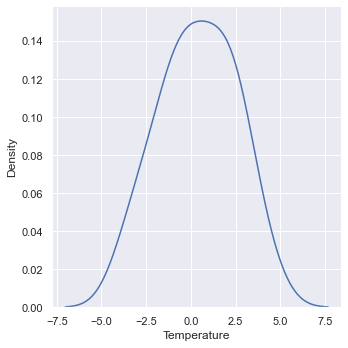

In [143]:
sns.displot(residuals_En, kind='kde')

In [144]:
print(mean_squared_error(y_test,En_pred))
print(mean_absolute_error(y_test,En_pred))
print(np.sqrt(mean_squared_error(y_test,En_pred)))

4.500398355317127
1.780773644721683
2.1214142347304845


In [145]:
score_En=r2_score(y_test,En_pred)  # accuracy of the model using ridge # r^2
print(score_En)

0.5740840442045421


In [146]:
En.score(X_test_sc,y_test)

0.5740840442045421

In [147]:
1-(1-score_En)*(len(y_test)-1)/(len(y_test)-X_test_sc.shape[1]-1)  #  accuracy of the model with adjusted r^2

0.07072882371900091

In [148]:
En1= ElasticNet(alpha= 0.05)  #  considering lambda=0.05

In [149]:
En1.fit(X_train_sc,y_train)

ElasticNet(alpha=0.05)

In [150]:
En1_pred=En1.predict(X_test_sc)

In [151]:
En1_pred

array([31.50444789, 31.18101566, 32.66101759, 29.3899621 , 30.8665159 ,
       34.24129184, 31.29614788, 34.00648909, 31.35923495, 31.47011062,
       26.22512912, 30.40184235, 30.52333093, 34.29625456, 31.77246688,
       30.96650164, 27.22643731, 32.94742802, 31.95905882, 26.45113155,
       28.45466981, 30.60832333, 34.9333963 , 33.99361515, 31.4655361 ])

In [152]:
score_En1=r2_score(y_test,En1_pred)  # accuracy of the model with lambda=0.05 using ridge # r^2
print(score_En1)

0.6572011658115513


In [153]:
En1.score(X_test_sc,y_test)

0.6572011658115513

In [154]:
1-(1-score_En1)*(len(y_test)-1)/(len(y_test)-X_test_sc.shape[1]-1)  #  accuracy of the model with adjusted r^2, with lambda=0.05

0.25207527086156645

In [155]:
y_test

54     31
76     36
35     32
101    33
118    31
72     35
5      31
55     36
1      29
50     33
2      26
53     28
38     32
81     36
37     33
49     33
92     25
73     35
67     32
121    25
44     30
51     28
84     34
70     35
107    30
Name: Temperature, dtype: int64